In [221]:
# Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import json
from matplotlib.colors import LinearSegmentedColormap



import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.geometry import LineString

# CMU Colors

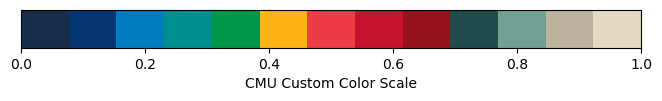

In [222]:
# CMU color scale in HEX
cmu_gradient_colors = [
    "#182C4B",  # Deep Blue (Weaver Blue)
    "#043673",  # Dark Blue (CMU Blue)
    "#007BC0",  # Sky Blue (Highlands Sky)
    "#008F91",  # Teal
    "#009647",  # Green Thread
    "#FDB515",  # Gold Thread
    "#EF3A47",  # Scots Rose (Bright Red)
    "#C41230",  # CMU Red
    "#941120",  # Dark Red (Skibo Red)
    "#1F4C4C",  # Deep Green (Hornbostel Teal)
    "#719F94",  # Palladian Green
    "#BCB49E",  # Soft Tan
    "#E4DAC4"   # Light Beige
]

# ListedColormap
cmu_cmap = mcolors.ListedColormap(cmu_gradient_colors, name="cmu_scale")

# Display color scale
fig, ax = plt.subplots(figsize=(8, 1))
fig.subplots_adjust(bottom=0.5)

# Create color bar
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap=cmu_cmap, norm=plt.Normalize(vmin=0, vmax=1)),
    cax=ax,
    orientation="horizontal"
)
cbar.set_label("CMU Custom Color Scale")

plt.show()

# Loading Files 

In [223]:
# Points and boundaries
geo_points_df = gpd.read_file('../data/facilities_points_rw.geojson')
dist_gdf = gpd.read_file('../data\District_Boundaries.geojson') # # https://rwanda.africageoportal.com/datasets/be7b39ac16094f1fba36f62c55b47986_0/explore
pop_df = pd.read_csv('rw_population.csv')

# Areas, centroids, and boundaries
dist_gdf["area"] = dist_gdf.area
dist_gdf["Centroid"] = dist_gdf.centroid
dist_gdf["boundary"] = dist_gdf.boundary
gdf = dist_gdf.copy()

#Facilities
all_facilities = geo_points_df['healthcare'].unique()

# Main facilities
main_facility = ['clinic', 'hospital', 'pharmacy', 'centre', 'alternative', 'laboratory']
num_facilities = len(main_facility)

# Color pallets 
colors = [
    "#FDB515",  # Gold Thread (Bright yellow-gold)
    "#941120",   # Skibo Red (Dark red)
    "#1F4C4C",  # Deep Green (Hornbostel Teal)
    "#009647",  # Green Thread (Strong green)
    "#043673",  # CMU Blue (Deep blue)
    "#EF3A47"  # Scots Rose (Vivid red)
]

# Print json of ditsricts and their surface areas
districts_areas = gdf[['district', 'area']]
json_districts_areas = districts_areas.to_json(orient='records')
print(json_districts_areas)


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_27748\2269328275.py:3: SyntaxWarning: invalid escape sequence '\D'
  dist_gdf = gpd.read_file('../data\District_Boundaries.geojson') # # https://rwanda.africageoportal.com/datasets/be7b39ac16094f1fba36f62c55b47986_0/explore


[{"district":"Nyarugenge","area":0.0107676087},{"district":"Gasabo","area":0.0348919994},{"district":"Kicukiro","area":0.0135770024},{"district":"Nyanza","area":0.0545895127},{"district":"Gisagara","area":0.0548408582},{"district":"Nyaruguru","area":0.0819123502},{"district":"Huye","area":0.0472511732},{"district":"Nyamagabe","area":0.0887126848},{"district":"Ruhango","area":0.0508872032},{"district":"Muhanga","area":0.0525611676},{"district":"Kamonyi","area":0.0536371008},{"district":"Karongi","area":0.0641216855},{"district":"Rutsiro","area":0.0537961889},{"district":"Rubavu","area":0.0274031576},{"district":"Nyabihu","area":0.0437082705},{"district":"Ngororero","area":0.0549868758},{"district":"Rusizi","area":0.0745606117},{"district":"Nyamasheke","area":0.0771476697},{"district":"Rulindo","area":0.0461100076},{"district":"Gakenke","area":0.0572127825},{"district":"Musanze","area":0.0428862056},{"district":"Burera","area":0.0524479662},{"district":"Gicumbi","area":0.0673215996},{"di

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_27748\2269328275.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dist_gdf["area"] = dist_gdf.area
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_27748\2269328275.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dist_gdf["Centroid"] = dist_gdf.centroid


# Ploting Maps 

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_27748\302338923.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  province_gdf["Centroid"] = province_gdf.geometry.centroid  # Compute province centroid


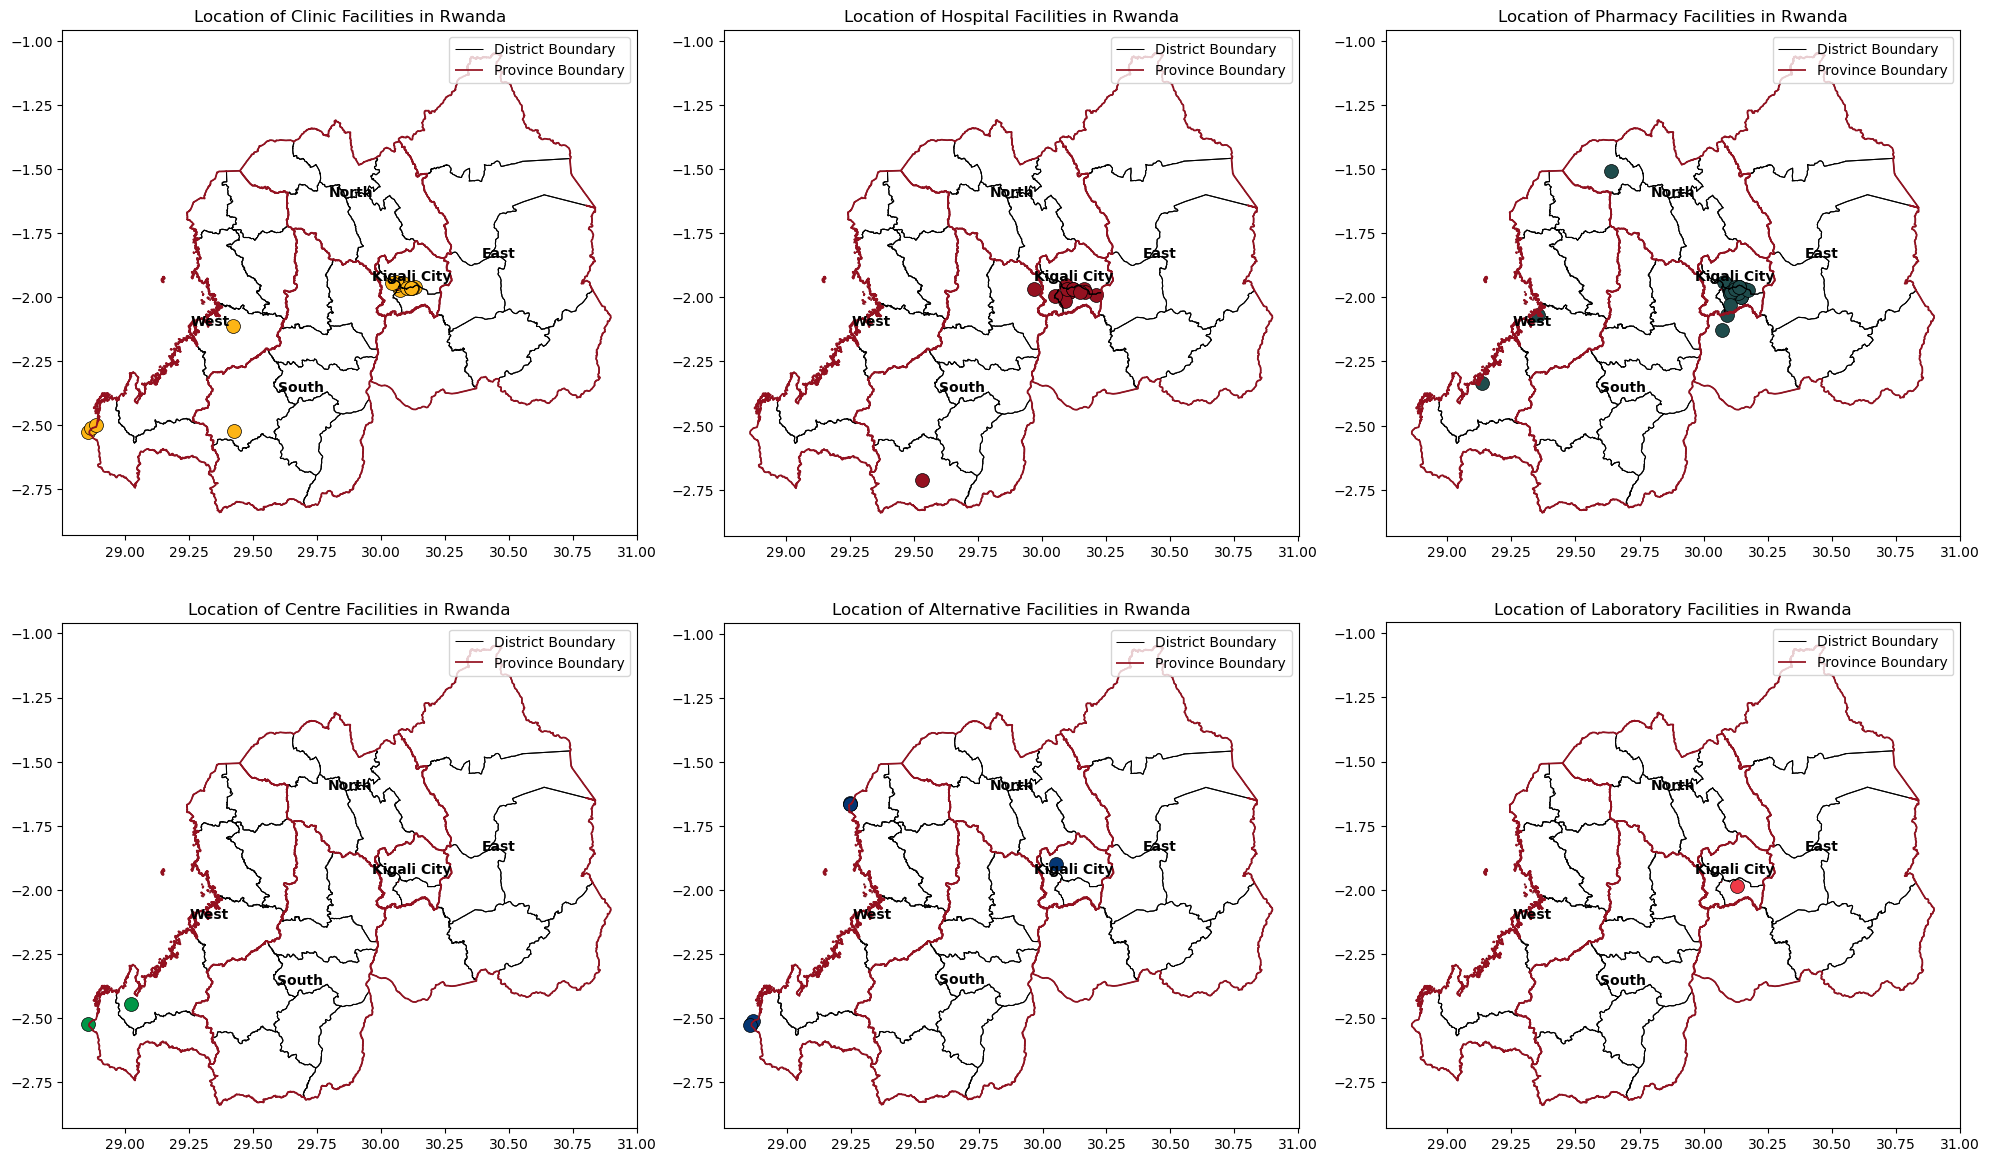

In [224]:
# Grid of subplots 
rows = 2 
cols = 3  
fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
axes = axes.flatten()

# Dissolved districts to get province boundaries and compute province centroids
province_gdf = gdf.dissolve(by='prov_code', as_index=False)
province_gdf["Centroid"] = province_gdf.geometry.centroid  # Compute province centroid

# Loop through each facility type and create a plot in the corresponding subplot
for i, facility in enumerate(main_facility):
    ax = axes[i]

    # Plot district and province boundaries
    gdf.boundary.plot(ax=ax, color='black', linewidth=0.75, label='District Boundary')
    province_gdf.boundary.plot(ax=ax, color='#941120', linewidth=1.25, label='Province Boundary')
    
    ax.legend()

    # Title for each plot
    ax.set_title(f"Location of {facility.capitalize()} Facilities in Rwanda", fontsize=12)

    # Annotate each province **only once** at its centroid
    for idx, row in province_gdf.iterrows():
        ax.annotate(text=row["province_eng"], 
                    xy=[row["Centroid"].x, row["Centroid"].y], 
                    ha='center', fontsize=10, fontweight='bold', color='black')

    # Filtered health facility
    facility_gdf = geo_points_df[geo_points_df['healthcare'] == facility]

    # Plot the selected health facility type with a unique color
    facility_gdf.plot(ax=ax, color=colors[i], markersize=100, label=facility, legend=True, edgecolor='black', linewidth=0.5)

# Hide any unused subplots
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


### Map with all facilities.

<Axes: >

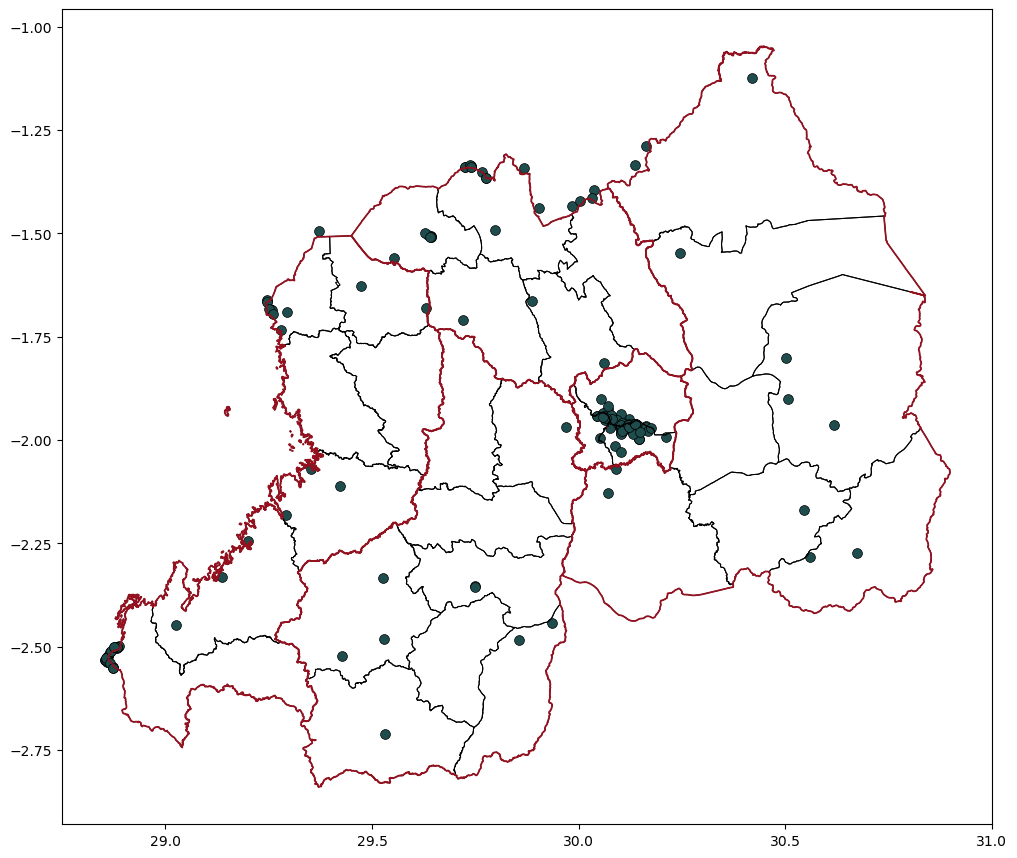

In [225]:
# Map of Rwanda with all health facilities
fig, ax = plt.subplots(figsize=(12, 12))
gdf.boundary.plot(ax=ax, color='black', linewidth=0.75, label='District Boundary')
province_gdf.boundary.plot(ax=ax, color='#941120', linewidth=1.25, label='Province Boundary')
geo_points_df.plot(ax=ax, color='#1F4C4C', markersize=50, label='Health Facilities', legend=True, edgecolor='black', linewidth=0.5)
#facility_gdf.plot(ax=ax, color="red", markersize=100, label=facility, legend=True, edgecolor='black', linewidth=0.5)



# Population Density 


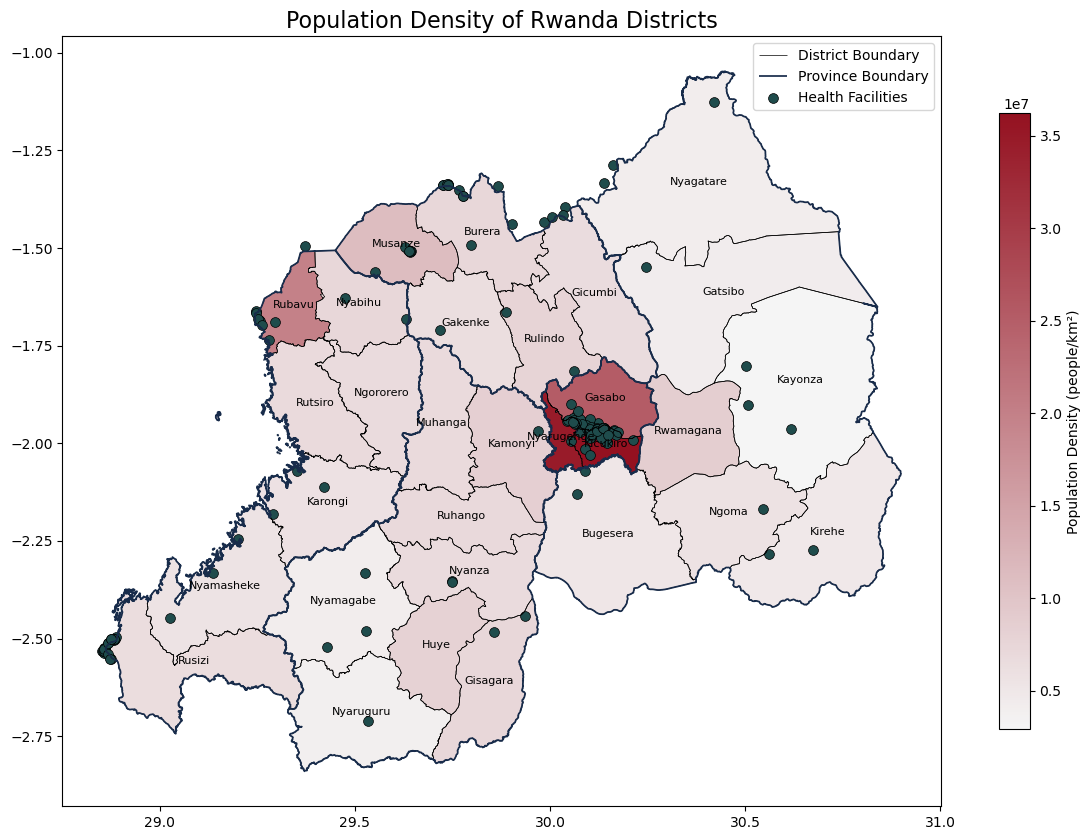

In [226]:
gdf['population'] = gdf['district'].map(pop_df.set_index('District')['Population'])
gdf['pop_density'] = gdf['population'] / gdf['area']
pop_dist_gdf = gdf.copy()

# Ensure the 'pop_density' column is numeric
gdf["pop_density"] = pd.to_numeric(gdf["pop_density"])

# Plot the heatmap
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the base map (district boundaries)
gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, label='District Boundary')

# #F5F5F5 #BCB49E
gradient = ["#F5F5F5", "#941120"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)


# Plot the population density heatmap
gdf.plot(column="pop_density", ax=ax, cmap=custom_cmap, legend=True, 
         legend_kwds={"label": "Population Density (people/km²)", "shrink": 0.8})
province_gdf.boundary.plot(ax=ax, color='#182C4B', linewidth=1.25, label='Province Boundary')

# Add district names as annotations (optional)
for idx, row in gdf.iterrows():
    ax.annotate(text=row["district"], 
                xy=[row["Centroid"].x, row["Centroid"].y], 
                ha='center', fontsize=8, color='black')

geo_points_df.plot(ax=ax, color='#1F4C4C', markersize=50, label='Health Facilities', legend=True, edgecolor='black', linewidth=0.5)

# Add title
plt.title("Population Density of Rwanda Districts", fontsize=16)
plt.legend()
# Show plot
plt.show()

Is there a correlation with the disease desity and facility distribution density??????????

# Disease Prevelence Annalysis 

In [227]:
# Total population for each province
province_population = gdf.groupby('province')['population'].sum().reset_index()
province_population.columns = ['province', 'total_population']

# Merge total population back into the original GeoDataFrame
gdf = gdf.merge(province_population, on='province', suffixes=('', '_total'))

# Population ratio
gdf['dist_pop_ratio'] = gdf['population'] / gdf['total_population']

# gdf.head(5)
disease_gdf = gdf.copy()
disease_gdf.head(5)

,objectid,code_dist,prov_code,province,province_eng,dist_code,district,source,capture,globalid,...,shape_Length,shape_Area,geometry,area,Centroid,boundary,population,pop_density,total_population,dist_pop_ratio
0,1,11,1,Umujyi wa Kigali,Kigali City,11,Nyarugenge,DLUP,2012,{79DEA8B0-F1F5-4BDB-ABFD-BBA8B9E75ED6},...,0.924370,0.010768,"MULTIPOLYGON Z (((29.98964 -1.86756 0, 29.9895...",0.010768,POINT (30.02887 -1.992),"MULTILINESTRING Z ((29.98964 -1.86756 0, 29.98...",374319,3.476343e+07,1745555,0.214441
1,2,12,1,Umujyi wa Kigali,Kigali City,12,Gasabo,DLUP,2012,{5A2A6334-F94F-4191-9BC7-1077A5061D38},...,1.010862,0.034892,"MULTIPOLYGON Z (((30.14786 -1.79269 0, 30.1480...",0.034892,POINT (30.14221 -1.89145),"MULTILINESTRING Z ((30.14786 -1.79269 0, 30.14...",879505,2.520649e+07,1745555,0.503854
2,3,13,1,Umujyi wa Kigali,Kigali City,13,Kicukiro,DLUP,2012,{2F253D10-9ADC-4318-9CA0-0DF3A7D50164},...,0.767627,0.013577,"MULTIPOLYGON Z (((30.14789 -1.95542 0, 30.1481...",0.013577,POINT (30.14373 -2.00886),"MULTILINESTRING Z ((30.14789 -1.95542 0, 30.14...",491731,3.621794e+07,1745555,0.281705
3,4,21,2,Amajyepfo,South,21,Nyanza,Single layer,2012,{4B50C062-7024-45FB-82D6-0513EF527A49},...,1.604870,0.054590,"MULTIPOLYGON Z (((29.95084 -2.23321 0, 29.9514...",0.054590,POINT (29.79335 -2.33584),"MULTILINESTRING Z ((29.95084 -2.23321 0, 29.95...",365718,6.699419e+06,3002699,0.121796
4,5,22,2,Amajyepfo,South,22,Gisagara,DLUP,2012,{15D1D4DC-D845-480A-9F21-098F04AC8280},...,1.381505,0.054841,"MULTIPOLYGON Z (((29.96337 -2.43834 0, 29.9636...",0.054841,POINT (29.84351 -2.61752),"MULTILINESTRING Z ((29.96337 -2.43834 0, 29.96...",397051,7.240058e+06,3002699,0.132231


### Tubaculosis 

In [228]:
with open("tuberculosis_data.json", "r") as file:
    tb_data = json.load(file) 

# Convert the JSON data to a DataFrame
tb_df = pd.DataFrame(tb_data)
tb_df = tb_df.T

tb_df['total_tb_cases'] = tb_df['women_number_with_symptom'] + tb_df['men_number_with_symptom']
tb_df.head(5)

# reset index and rename column to province
tb_df.reset_index(inplace=True)
tb_df.rename(columns={'index': 'category'}, inplace=True)

# disease_gdf['tb_cases'] = total_tb_cases*dist_pop_ratio where province_eng == index of tb_df
disease_gdf['tb_dist_cases'] = disease_gdf['province_eng'].map(tb_df.set_index('category')['total_tb_cases']) * disease_gdf['dist_pop_ratio']
disease_gdf['tb_density'] = disease_gdf['tb_dist_cases'] / disease_gdf['area']

#disease_gdf.head(5)


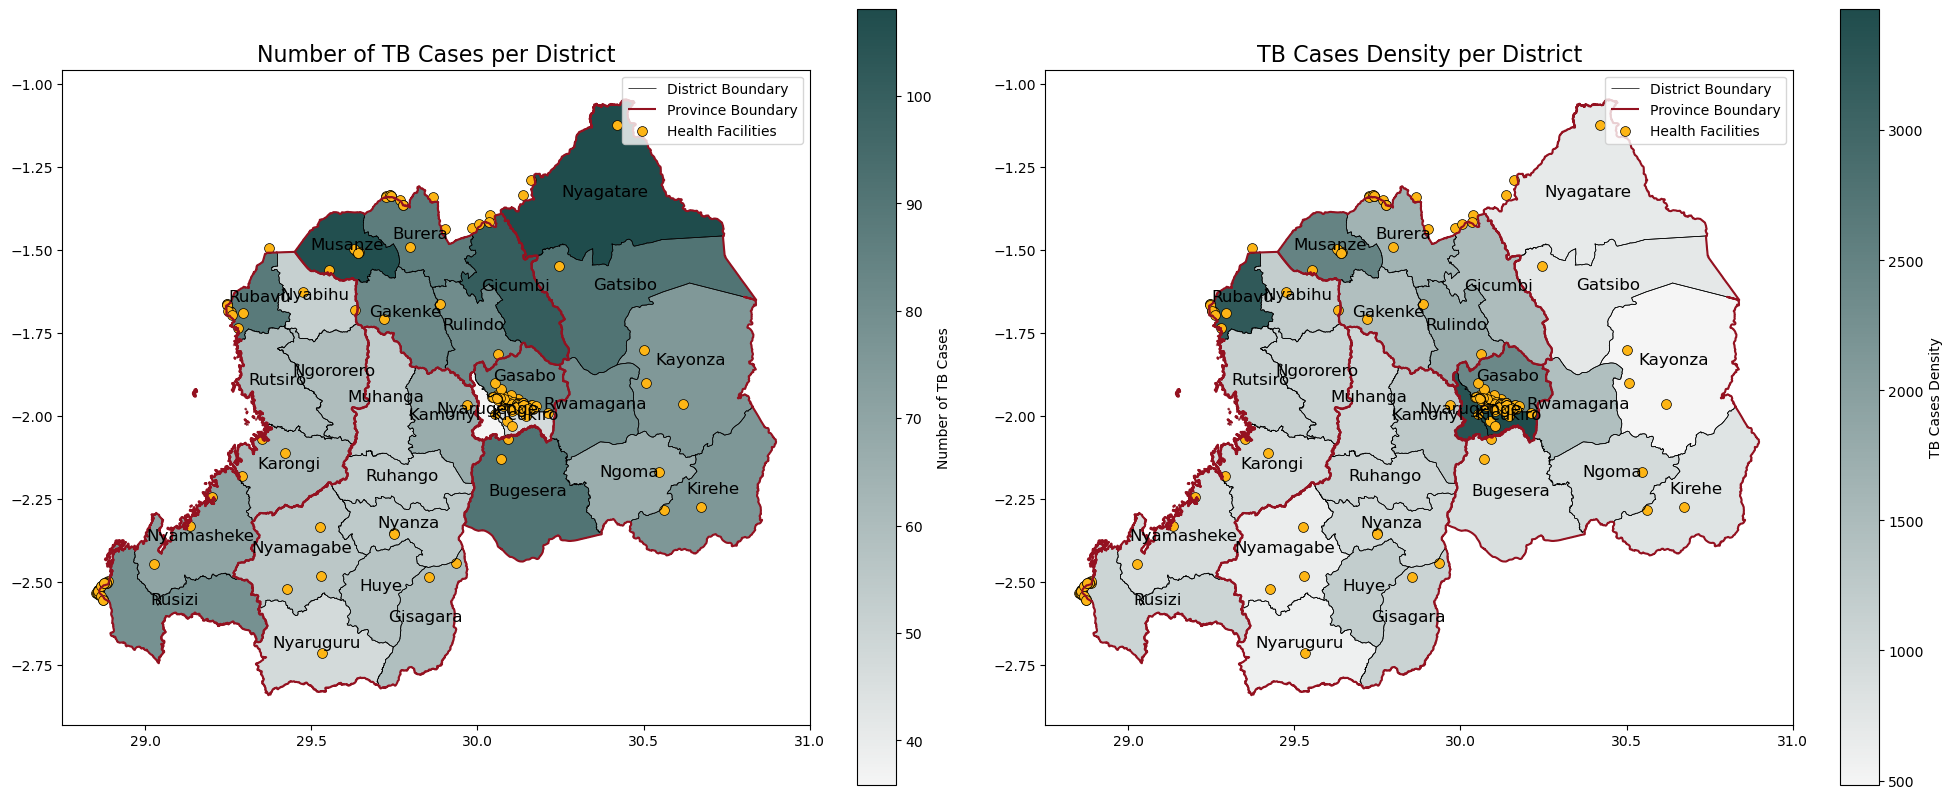

In [235]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Define the gradient for the colormap
gradient = ["#F5F5F5", "#1F4C4C"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)

# --- First Plot: TB Cases per District ---
# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=axes[0], color="black", linewidth=0.5, label='District Boundary')

# Plot the TB cases heatmap
disease_gdf.plot(column="tb_dist_cases", ax=axes[0], cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "Number of TB Cases", "shrink": 0.8})

# Plot province boundaries
province_gdf.boundary.plot(ax=axes[0], color='#941120', linewidth=1.5, label='Province Boundary')

# Add district names as annotations
for idx, row in disease_gdf.iterrows():
    axes[0].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, color='black')

# Plot health facilities
geo_points_df.plot(ax=axes[0], color='#FDB515', markersize=50, label='Health Facilities', 
                   legend=True, edgecolor='black', linewidth=0.5)

# Add title for the first plot
axes[0].set_title("Number of TB Cases per District", fontsize=16)
axes[0].legend()

# --- Second Plot: TB Density per District ---
# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=axes[1], color="black", linewidth=0.5, label='District Boundary')

# Ploting the TB density heatmap
disease_gdf.plot(column="tb_density", ax=axes[1], cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "TB Cases Density", "shrink": 0.8})

# Ploting province boundaries
province_gdf.boundary.plot(ax=axes[1], color='#941120', linewidth=1.5, label='Province Boundary')

# Adding district names as annotations
for idx, row in disease_gdf.iterrows():
    axes[1].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, color='black')

# Plot of health facilities
geo_points_df.plot(ax=axes[1], color='#FDB515', markersize=50, label='Health Facilities', 
                   legend=True, edgecolor='black', linewidth=0.5)

axes[1].set_title("TB Cases Density per District", fontsize=16)
axes[1].legend()

# Adjusting plot layout
plt.tight_layout()
plt.show()

### Malaria:
Just cases discovered via microscopy are considered. They are similar to number of cases discovered with rapid diagnostics test (RDT)

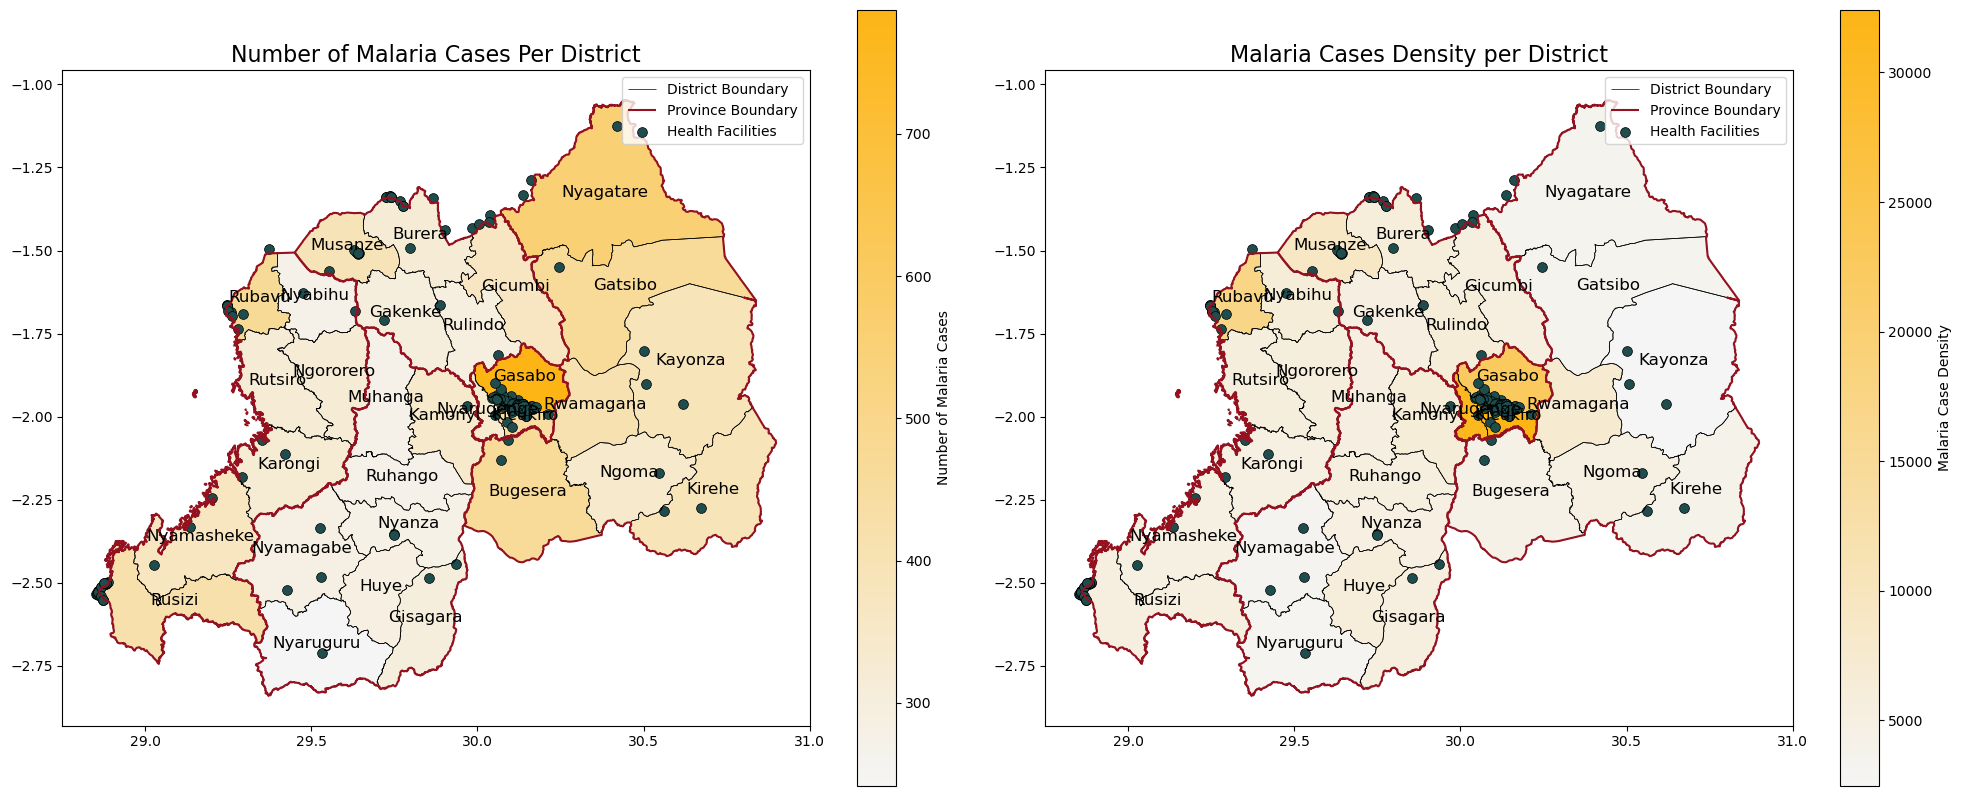

1        Gasabo
23    Nyagatare
13       Rubavu
24      Gatsibo
28     Bugesera
2      Kicukiro
16       Rusizi
29    Rwamagana
20      Musanze
26       Kirehe
Name: district, dtype: object
23    Nyagatare
20      Musanze
22      Gicumbi
24      Gatsibo
28     Bugesera
13       Rubavu
21       Burera
1        Gasabo
19      Gakenke
18      Rulindo
Name: district, dtype: object


In [254]:
malaria_df = pd.read_csv('rw_malaria.csv')

malaria_df['total_malaria_cases'] = malaria_df['num_of_women'] + malaria_df['num_of_children']

disease_gdf['malaria_dist_cases'] = disease_gdf['province_eng'].map(malaria_df.set_index('province')['total_malaria_cases']) * disease_gdf['dist_pop_ratio']
disease_gdf['malaria_density'] = disease_gdf['malaria_dist_cases'] / disease_gdf['area']

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Define the gradient for the colormap
gradient = ["#F5F5F5", "#FDB515"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)

# --- First Plot: TB Cases per District ---
# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=axes[0], color="black", linewidth=0.5, label='District Boundary')

# Plot the Malaria cases heatmap
disease_gdf.plot(column="malaria_dist_cases", ax=axes[0], cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "Number of Malaria Cases", "shrink": 0.8})

# Plot province boundaries
province_gdf.boundary.plot(ax=axes[0], color='#941120', linewidth=1.5, label='Province Boundary')

# Add district names as annotations
for idx, row in disease_gdf.iterrows():
    axes[0].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, color='black')

# Plot health facilities
geo_points_df.plot(ax=axes[0], color='#1F4C4C', markersize=50, label='Health Facilities', 
                   legend=True, edgecolor='black', linewidth=0.5)

# Add title for the first plot
axes[0].set_title("Number of Malaria Cases Per District", fontsize=16)
axes[0].legend()

# --- Second Plot: TB Density per District ---
# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=axes[1], color="black", linewidth=0.5, label='District Boundary')

# Ploting the TB density heatmap
disease_gdf.plot(column="malaria_density", ax=axes[1], cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "Malaria Case Density", "shrink": 0.8})

# Ploting province boundaries
province_gdf.boundary.plot(ax=axes[1], color='#941120', linewidth=1.5, label='Province Boundary')

# Adding district names as annotations
for idx, row in disease_gdf.iterrows():
    axes[1].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, color='black')

# Plot of health facilities
geo_points_df.plot(ax=axes[1], color='#1F4C4C', markersize=50, label='Health Facilities', 
                   legend=True, edgecolor='black', linewidth=0.5)

axes[1].set_title("Malaria Cases Density per District", fontsize=16)
axes[1].legend()

# Adjusting plot layout
plt.tight_layout()
plt.show()

# Districts with the highest number of Malaria cases
malaria_top_districts = disease_gdf.sort_values(by='malaria_dist_cases', ascending=False).head(10)
tb_top_districts = disease_gdf.sort_values(by='tb_dist_cases', ascending=False).head(10)

print(malaria_top_districts['district'])
print(tb_top_districts['district'])

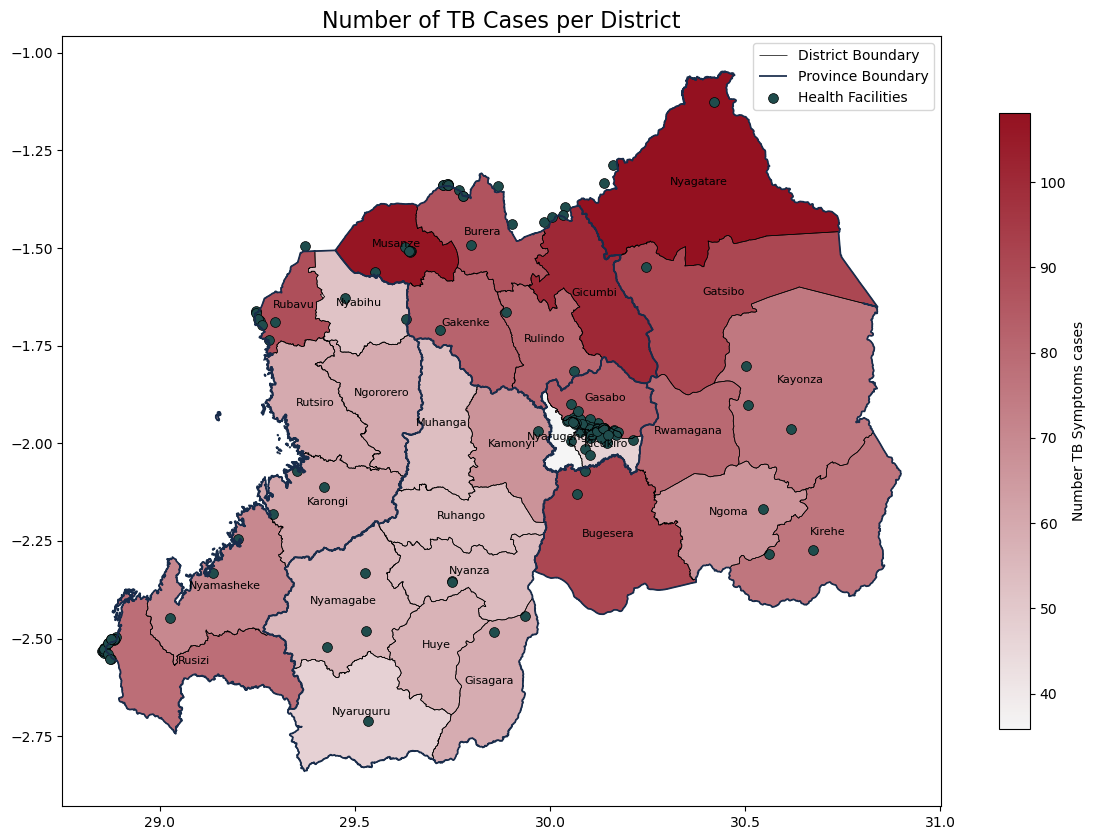

In [230]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, label='District Boundary')

# #F5F5F5 #BCB49E
gradient = ["#F5F5F5", "#941120"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)


# Plot the tb population heatmap
disease_gdf.plot(column="tb_dist_cases", ax=ax, cmap=custom_cmap, legend=True, 
         legend_kwds={"label": "Number TB Symptoms cases", "shrink": 0.8})
province_gdf.boundary.plot(ax=ax, color='#182C4B', linewidth=1.25, label='Province Boundary')

# Add district names as annotations (optional)
for idx, row in disease_gdf.iterrows():
    ax.annotate(text=row["district"], 
                xy=[row["Centroid"].x, row["Centroid"].y], 
                ha='center', fontsize=8, color='black')

geo_points_df.plot(ax=ax, color='#1F4C4C', markersize=50, label='Health Facilities', legend=True, edgecolor='black', linewidth=0.5)

# Add title
plt.title("Number of TB Cases per District", fontsize=16)
plt.legend()
# Show plot
plt.show()

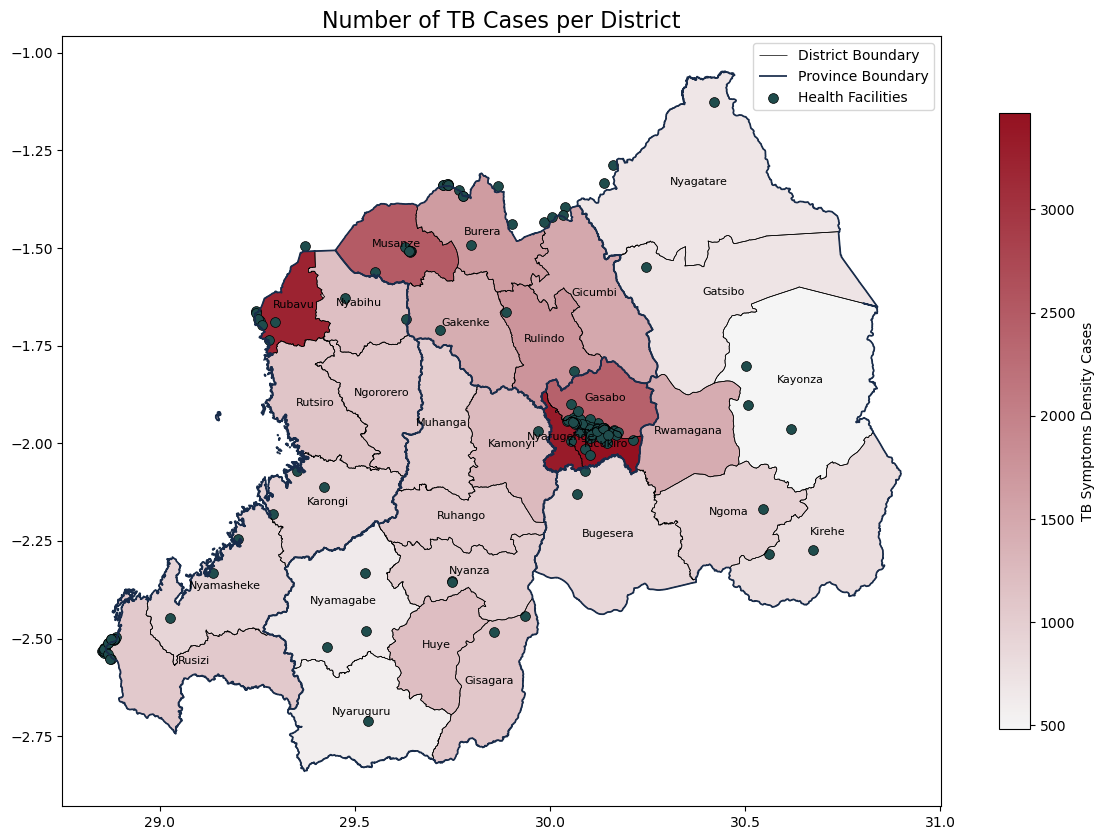

In [231]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, label='District Boundary')

# #F5F5F5 #BCB49E
gradient = ["#F5F5F5", "#941120"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)


# Plot the tb population heatmap
disease_gdf.plot(column="tb_density", ax=ax, cmap=custom_cmap, legend=True, 
         legend_kwds={"label": "TB Symptoms Density Cases", "shrink": 0.8})
province_gdf.boundary.plot(ax=ax, color='#182C4B', linewidth=1.25, label='Province Boundary')

# Add district names as annotations (optional)
for idx, row in disease_gdf.iterrows():
    ax.annotate(text=row["district"], 
                xy=[row["Centroid"].x, row["Centroid"].y], 
                ha='center', fontsize=8, color='black')

geo_points_df.plot(ax=ax, color='#1F4C4C', markersize=50, label='Health Facilities', legend=True, edgecolor='black', linewidth=0.5)

# Add title
plt.title("Number of TB Cases per District", fontsize=16)
plt.legend()
# Show plot
plt.show()

### Focus on the health centers that are capable of handling tubaculosis